# 머신러닝 프로젝트

## Airbnb (New York City)
- 미국 NYC Airbnb 목록(2019)
- 데이터 출처:https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data (License CC0: Public Domain)
- 프로젝트 목적: 가격 예측(price)
- 제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)
- 평가 방식: MSE


# 성능향상 Tip

In [2]:
# 라이브러리 
import pandas as pd

In [3]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## EDA

In [4]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [5]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


<Axes: >

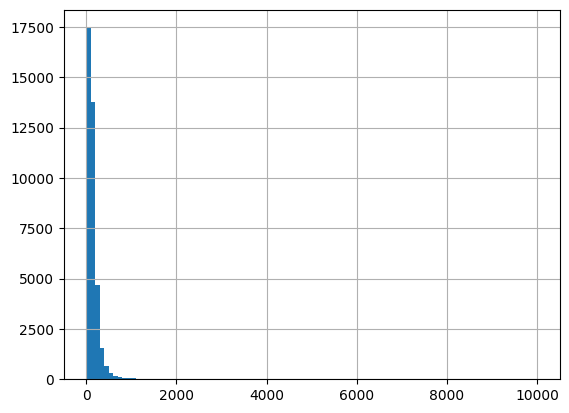

In [6]:
# target(hist)
train['price'].hist(bins=100)

## 데이터 전처리

In [7]:
import numpy as np
print(train['price'][:3])
print(np.log1p(train['price'])[:3])
print(np.expm1(np.log1p(train['price'])[:3]))

0     70
1    240
2    150
Name: price, dtype: int64
0    4.262680
1    5.484797
2    5.017280
Name: price, dtype: float64
0     70.0
1    240.0
2    150.0
Name: price, dtype: float64


<Axes: >

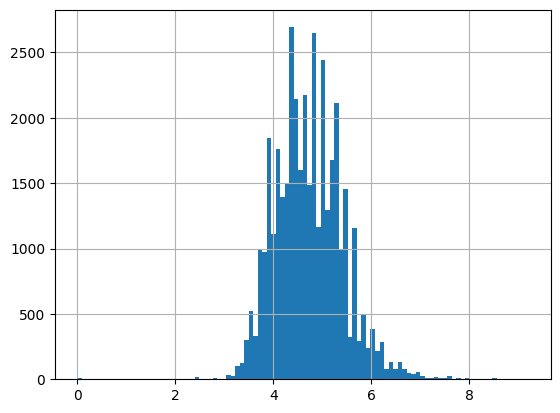

In [8]:
train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

In [9]:
# 결측치 컬럼 삭제 (last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [10]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [11]:
# 결측치 확인
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [12]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [13]:
# 수치형 피처 선택
# 수치형 데이터와 범주형 데이터 분리 
n_train = train.select_dtypes(exclude='object').copy()
c_train = train.select_dtypes(include='object').copy()
n_test = test.select_dtypes(exclude='object').copy()
c_test = test.select_dtypes(include='object').copy()

In [14]:
n_train.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000
mean,1.898464e+07,6.774143e+07,40.728848,-73.952125,6.990720,23.272855,1.091963,7.090756,112.980826
std,1.099302e+07,7.881383e+07,0.054499,0.046354,20.310323,44.589170,1.600772,32.661136,131.674306
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.412608e+06,7.834978e+06,40.690038,-73.983190,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.963650e+07,3.070949e+07,40.723000,-73.955740,2.000000,5.000000,0.370000,1.000000,45.000000
75%,2.913445e+07,1.074344e+08,40.762943,-73.936338,5.000000,23.000000,1.590000,2.000000,228.000000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000


In [15]:
# 수치형 변수
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = [
        'host_id',
        'latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

display(n_train.head(1))
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
display(n_train.head(1))

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,94219511,40.80167,-73.95781,3,3,0.09,2,0


,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,0.343458,0.731742,0.539318,0.001601,0.004769,0.001538,0.003067,0.0


In [16]:
n_train = n_train.drop('id', axis=1)
n_test = n_test.drop('id', axis=1)

In [17]:
c_train.head(1)

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room


In [18]:
c_train.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,39104,39099,39116,39116,39116
unique,38420,9977,5,221,3
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt
freq,15,338,17331,3099,20299


In [19]:
# 범주형 변수
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
        'neighbourhood_group',
        'neighbourhood',
        'room_type'
        ]

display(c_train.head(1))
for col in cols:
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])

display(c_train.head(1))

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room


,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,2,94,1


In [20]:
del_cols =['name','host_name']
c_train = c_train.drop(del_cols, axis=1)
c_test = c_test.drop(del_cols, axis=1)

In [21]:
# 분리한 데이터 다시 합침
train = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)
print(train.shape, test.shape)
train.head()

(39116, 11) (9779, 11)


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.343458,0.731742,0.539318,0.001601,0.004769,0.001538,0.003067,0.000000,2,94,1
1,0.178671,0.631633,0.478445,0.000801,0.101749,0.028718,0.003067,0.717808,2,95,0
2,0.001595,0.558041,0.449354,0.047238,0.001590,0.003419,0.000000,0.000000,2,209,0
3,0.013033,0.464162,0.579361,0.002402,0.379968,0.049402,0.003067,0.002740,1,13,0
4,0.045468,0.458611,0.543571,0.021617,0.000000,0.000000,0.000000,0.000000,1,13,1


## 검증 데이터 분리

In [22]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 11), (7824, 11), (31292,), (7824,))

## 머신러닝

In [33]:
#릿지 회귀
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha_values = [0.001, 0.01, 0.05, 0.1, 1, 10]
best_alpha = None
best_mse = float('inf')  
for alpha in alpha_values:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)
    y_pred = model_ridge.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

print("Best alpha:", best_alpha)
print("Lowest Mean Squared Error:", best_mse)

Best alpha: 0.001
Lowest Mean Squared Error: 0.249720248476652


In [34]:
#라쏘 회귀
from sklearn.linear_model import Lasso
alpha_values = [0.001, 0.01, 0.05, 0.1, 1, 10]
best_alpha = None
best_mse = float('inf')  
for alpha in alpha_values:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train)
    y_pred = model_lasso.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

print("Best alpha:", best_alpha)
print("Lowest Mean Squared Error:", best_mse)

Best alpha: 0.001
Lowest Mean Squared Error: 0.2525704333093906


In [35]:
#엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
l1_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
best_l1_ratio = None
best_mse = float('inf')  
alpha = 0.0001
for l1_ratio in l1_ratios:
    model_E = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model_E.fit(X_train, y_train)
    y_pred = model_E.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_l1_ratio = l1_ratio

print("Best L1 Ratio:", best_l1_ratio)
print("Lowest Mean Squared Error:", best_mse)

Best L1 Ratio: 0.9
Lowest Mean Squared Error: 0.25007063871348545


In [39]:
model_ridge = Ridge(alpha=0.001)
model_ridge.fit(X_train, y_train)
model_lasso = Lasso(alpha=0.001)
model_lasso.fit(X_train, y_train)
model_E = ElasticNet(alpha=0.0001, l1_ratio=0.9)
model_E.fit(X_train, y_train)

ElasticNet(alpha=0.0001, l1_ratio=0.9)

In [40]:
pred = model_ridge.predict(test)

pred = np.expm1(pred)
mean_squared_error(y_test, pred)

50188.87278517524

In [41]:
pred = model_lasso.predict(test)
pred = np.expm1(pred)
mean_squared_error(y_test, pred)

50263.5114205704

In [42]:
pred = model_E.predict(test)

pred = np.expm1(pred)
mean_squared_error(y_test, pred)

50194.11154496014

In [38]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model_RF = RandomForestRegressor(random_state=2022, n_estimators=200)
model_RF.fit(X_train, y_train)
pred = model_RF.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

23255.03940550601

In [43]:
pred = model_RF.predict(test)

pred = np.expm1(pred)
mean_squared_error(y_test, pred)

43881.93904479839

In [ ]:
# Xgboost
from xgboost import XGBRegressor
model_XG = XGBRegressor(max_depth=10,
                     learning_rate=0.02,
                     n_estimators=500,
                     random_state=2022)

model_XG.fit(X_train, y_train)
pred = model_XG.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

## 채점

In [32]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('y_test.csv')

# Xgboost
pred = model.predict(test)

pred = np.expm1(pred)
mean_squared_error(y_test, pred)

43046.55530914565

In [44]:
# 하이퍼파라미터
params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.9, 0.8, 0.7]})

In [45]:
grid.best_params_

{'subsample': 0.7, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05}

In [49]:
xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 7,
    n_estimators =200,
    subsample = 0.7
)
xgb.fit(X_train,y_train)
pred = xgb.predict(X_val)
mean_squared_error(y_val, y_pred)

0.25007063871348545

In [50]:
pred = xgb.predict(test)

pred = np.expm1(pred)
mean_squared_error(y_test, pred)

43615.80652344077

# 회고 
baseline을 바탕으로 여러 회귀 모델들을 만들어 보았는데, 역시나 예상대로 xgboost의 성능이 43046.56 정도로 가장 좋게 나왔다. Label_Encoding을 할 때, neighborhood를 제거할 경우,

- 50244.25412062721 (ridge)
- 50328.13802702594 (lasso)
- 50250.4518314771 (elastic)
- 44012.806170430806 (randomforest)
- 43298.969619241696 (xgboost)
- 43823.51914412543 (xgbregressor)

같이 오히려 낮은 성능을 보였다.
이상치 몇개를 제거하거나 host_id를 제거했을 때도 마찬가지로 더 낮은 성능을 보였다.
feature engineering에는 정말 많은 시간과 노력이 필요한 것을 다시한번 느꼈다.